## Install Packages

In [25]:
# Basic
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Model training
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv("study.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X = df.drop(columns=["math_score"])
y = df["math_score"]

In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [14]:
y

,math_score
0,72
1,69
2,90
3,47
4,76
...,...
995,88
996,62
997,59
998,68


In [15]:
X.shape

(1000, 19)

## Encoding columns

In [10]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [11]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("encoder", OneHotEncoder(), cat_features),
                        ("scaler", StandardScaler(), num_features),])

In [12]:
X = ct.fit_transform(X)

In [13]:
X.shape

(1000, 19)

In [40]:
X[:5]

array([[ 1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  1.77010859,  1.64247471],
       [ 0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.   

## Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Models Evaluation

In [32]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "SVM Regression": LinearSVR(),
    "K neighbour": KNeighborsRegressor(),
}
model_list = []
r2_list = []
for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(X_train, y_train)

  y_test_pred = model.predict(X_test)
  y_train_pred = model.predict(X_train)

  model_test_r2 = r2_score(y_test, y_test_pred)
  model_train_r2 = r2_score(y_train, y_train_pred)
  r2_list.append(model_test_r2)
  model_list.append(list(models.keys())[i])

  print(list(models.keys())[i])
  print("Model performance for training set")
  print(model_train_r2)
  print("-"*50)
  print("Model performance for test set")
  print(model_test_r2)
  print("="*50)
  print("\n")

Linear Regression
Model performance for training set
0.8743172040139593
--------------------------------------------------
Model performance for test set
0.8804332983749564


Decision Tree
Model performance for training set
0.9996534669718089
--------------------------------------------------
Model performance for test set
0.7365808273581154


Random Forest Regression
Model performance for training set
0.9765943961486369
--------------------------------------------------
Model performance for test set
0.8510430335331831


SVM Regression
Model performance for training set
0.8720914009090708
--------------------------------------------------
Model performance for test set
0.8808022785190598


K neighbour
Model performance for training set
0.8558112109131623
--------------------------------------------------
Model performance for test set
0.7821922064088529




In [33]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
3,SVM Regression,0.880802
0,Linear Regression,0.880433
2,Random Forest Regression,0.851043
4,K neighbour,0.782192
1,Decision Tree,0.736581


## SVM Regresssion

In [35]:
reg_model = LinearSVR()
reg_model = reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"Accuracy of the model is {score*100}")

Accuracy of the model is 88.09106443018422


## Visualise

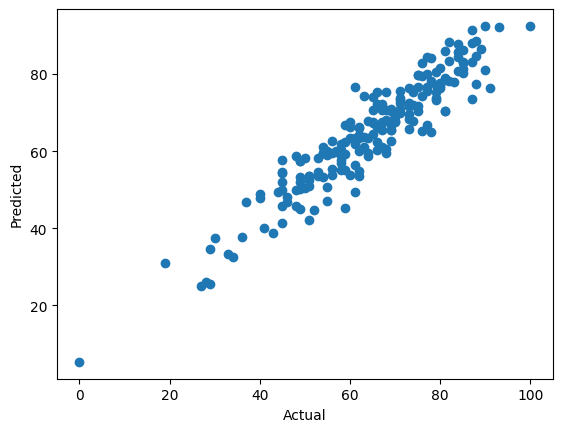

In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [38]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.434560,14.565440
737,53,58.142736,-5.142736
740,80,76.518788,3.481212
660,74,75.913640,-1.913640
411,84,87.910078,-3.910078
...,...,...,...
408,52,44.753203,7.246797
332,62,63.403224,-1.403224
208,74,67.840064,6.159936
613,65,67.454544,-2.454544
